# Data Exploration

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:

* Calculate the total number of customers in each section
* Calculate the total number of customers in each section over time
* Display the number of customers at checkout over time
* Calculate the time each customer spent in the market
* Calculate the total number of customers present in the supermarket over time.
* Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mon = pd.read_csv('/Users/braulio/Documents/gitSPICED/logistic-lemongrass-student-code/Week_08/data/monday.csv', delimiter=
                  ';', parse_dates=True)
tue = pd.read_csv('/Users/braulio/Documents/gitSPICED/logistic-lemongrass-student-code/Week_08/data/tuesday.csv', delimiter=
                  ';', parse_dates=True)
wed = pd.read_csv('/Users/braulio/Documents/gitSPICED/logistic-lemongrass-student-code/Week_08/data/wednesday.csv', delimiter=
                  ';', parse_dates=True)
thu = pd.read_csv('/Users/braulio/Documents/gitSPICED/logistic-lemongrass-student-code/Week_08/data/thursday.csv', delimiter=
                  ';', parse_dates=True)
fri = pd.read_csv('/Users/braulio/Documents/gitSPICED/logistic-lemongrass-student-code/Week_08/data/friday.csv', delimiter=
                  ';', parse_dates=True)

In [3]:
mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [4]:
mon.columns

Index(['timestamp', 'customer_no', 'location'], dtype='object')

In [5]:
mon.count()

timestamp      4884
customer_no    4884
location       4884
dtype: int64

In [6]:
frames = [mon, tue, wed, thu, fri]
df = pd.concat(frames)
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


# 1)

In [8]:
# Calculate the total number of customers in each section
df.groupby('location').count()

,timestamp,customer_no
location,,
checkout,7417,7417
dairy,4679,4679
drinks,3905,3905
fruit,5122,5122
spices,3754,3754


# 2)

In [9]:
# Calculate the total number of customers in each section over time

In [10]:
customer_count = df.groupby(['timestamp', 'location']).count()
customer_count.head()

customer_no
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               2
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2

In [11]:
df['customers@time'] = df.groupby('timestamp').transform('count')['customer_no']

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day'] = pd.to_datetime(df['timestamp']).dt.day

In [13]:
df['hour_day'] = df['hour'].apply(str) + 'h/ ' + df['day'].apply(str)

In [14]:
df.set_index('timestamp', inplace=True)

In [15]:
df.head()

,customer_no,location,customers@time,hour,day,hour_day
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,2,7,2,7h/ 2
2019-09-02 07:03:00,2,dairy,2,7,2,7h/ 2
2019-09-02 07:04:00,3,dairy,6,7,2,7h/ 2
2019-09-02 07:04:00,4,dairy,6,7,2,7h/ 2
2019-09-02 07:04:00,5,spices,6,7,2,7h/ 2


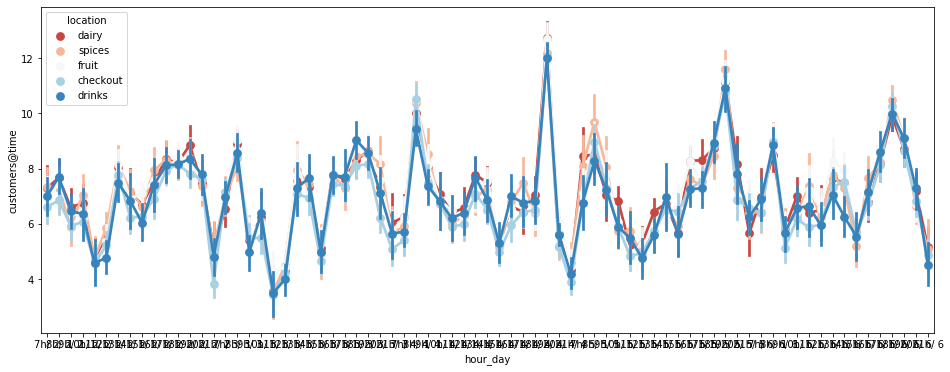

In [16]:
# plt.figure(figsize=(14,6))
# sns.barplot(x = 'timestamp', y = 'customer_no', data = customer_count, hue = 'location')

plt.figure(figsize=(16,6))

sns.pointplot(x = "hour_day", y = "customers@time", data = df, hue = "location", palette = "RdBu", legend='full')

# 3)

In [17]:
# Display the number of customers at checkout over time
df2 = df[df["location"]=='checkout']
df2.head()

,customer_no,location,customers@time,hour,day,hour_day
timestamp,,,,,,
2019-09-02 07:05:00,1,checkout,4,7,2,7h/ 2
2019-09-02 07:05:00,5,checkout,4,7,2,7h/ 2
2019-09-02 07:06:00,2,checkout,8,7,2,7h/ 2
2019-09-02 07:06:00,3,checkout,8,7,2,7h/ 2
2019-09-02 07:07:00,8,checkout,4,7,2,7h/ 2


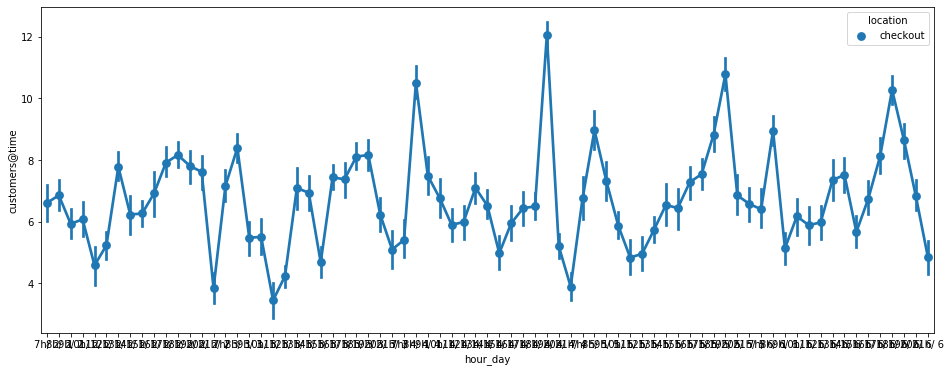

In [18]:
plt.figure(figsize=(16,6))

sns.pointplot(x = "hour_day", y = "customers@time", data = df2, hue = "location")

# 4)

In [19]:
# Calculate the time each customer spent in the market

df['customer_no'].value_counts()

526     42
186     35
63      34
167     34
1238    31
        ..
1526     4
1535     2
1534     2
1533     1
1532     1
Name: customer_no, Length: 1535, dtype: int64

### Extra challenge: Revenue Estimate

Estimate the total revenue for a customer using the following table:

section	revenue per minute
- fruit	    |4€
- spices	|3€
- dairy	    |5€
- drinks	|6€

Which is the most profitable section according to your data?